<a href="https://colab.research.google.com/github/nmningmei/LevelUpPythonTutorial/blob/master/4_0_Machine_Learning_Fundamentals_and_Applications_in_Cognitive_Neuroscience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import YouTubeVideo,Image

# What is machine learning?

## Definition

Generally, machine learning is the field of study that gives computers the ability to learn without being explicitly programmed (Samuel, 1959).

A computer program is said to learn from experience $E$  with respect to some class of tasks $T$ and performance measure $P$, if its performance at task in $T$, as measured by $P$, improves with experience $E$ (Michel, 1999)

For example:
- E exposure to a structured sequence
- T is predicting the next element in the sequence
- P is a measure of similarity between the predicted element and the true element

## Generally speaking

Machine Learning is an umbrella term for many concepts and algorithms.

In [ ]:
Image(url = 'https://i.redd.it/m2osa7zudpd41.jpg',width = 800)

## Types of learning approaches

1. Supervised learning -- Labled data
2. Unsupervised learning -- Unlabled data
3. Semi-supervised learning -- Mixture of labled and unlabled data
4. Reinforcement learning -- Implementation of rewards system (not commonly used in cognitive neurosience, but see https://onlinelibrary.wiley.com/doi/abs/10.1002/wcs.57)

## A bit of terminology

- <b>Training example/sample:</b> A row representing an observation/time point/participant
- <b>Feature(s) ($X$):</b> Each column representing different attributes of the training example
- <b>Target/Outcome ($y$):</b> What to predict
- <b>Training:</b> Fitting a model to $X$ that attempts to reproduce $y$.
- <b>Prediction ($ŷ$):</b> Result of passing a set of features ($x$) through a model (forward-pass)
- <b>Loss:</b> Function that computes error by contrasting $y$ to $ŷ$
- <b>Cost:</b> Overall cost for all training examples (defined as a function)
<br><i>Note: Some authors use cost and loss interchangeably, and some with opposite definitions</i>
- <b>Objective function ($E(x)$):</b> General term for a function that measures degree of error and can be optimized (maximized/minimized)
- <b>Optimizer:</b> Algorithm to efficiently reach minimum or maximum of an objective function. To properly work on an objective function, it has to be continuously differentiably.

## Practice

Use any command in the following code cells to answer these questions:<br>
1. How many training examples in the following dataset? -- the more the better
2. How many features in the dataset? -- the less inter-correlated between them the better, and the more the better
3. What is the target type? (continuous, discrete, categorical) -- what is your goal?
4. Given this target, what would be the best approach from the ML perspective? (Classification or Regression)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
df = pd.DataFrame(data=np.c_[data['data'], data['target']],
                  columns=list(data['feature_names'])+['target'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Machine Learning: Just glorified statistics?

Both ML and statistics can be used to perform hypothesis testing. While statistical inference tries to estimate population parameters from the data, ML tries to find generalizable predictive patterns (Bzdok, Altma, & Krzywinki, 2018)

For example, to address the previous problem we could use a linear regression. Given:
$$Y = \alpha + \beta \cdot X + \epsilon $$
solve for $\alpha$ and $\beta$
<br />where Y is experimental conditions, and X is behavioral/neural data

<br>If the columns in matrix $X$ are independent, it has a unique solution, also called normal equation(s).
$$\beta = (X'X)^{-1}X'Y$$


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

betas = np.dot(np.linalg.inv(np.dot(np.transpose(X), X)),
                            np.dot(np.transpose(X), y))

print(betas)

[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


However, this is not always the case. Therefore both ML and statistic approach try to reduce the squared distance between predicted and observed values of Y. The objective function is RMSE and can be minimized using different estimators. One of the most widely used is OLS.

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
print(model.params)

print('Difference between the two models: ', 
      sum(x - y for x,y in zip(model.params, betas)))

[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]
Difference between the two models:  4.9354895170772295e-12


In statistics you care about the parameter values for each of the features. In ML, however you care about predicting unobserved data points (generalizing).

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


Why are the parameters different?
<br><i>Hint: Intercept</i>

<b>But how do we generalize this?</b>

- Splitting data (train/dev/test)
- Model selection and tuning

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)
reg.fit(X,y)
print(reg.coef_)

print('Difference between the two approaches: ', 
      sum(x - y for x,y in zip(reg.coef_,betas)))

[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]
Difference between the two approaches:  4.926004916472326e-12


# Splitting data

Important considerations:

- Most common 80-20 splits
- Splits should be on shuffled data
- Possibility of not covering all labels
- Large amounts of data are necessary

In [ ]:
Image(url='https://miro.medium.com/max/948/1*4G__SV580CxFj78o9yUXuQ.png', width=800)

More types of cross-validation to be covered in next meeting.

## For more info, take a look at this video

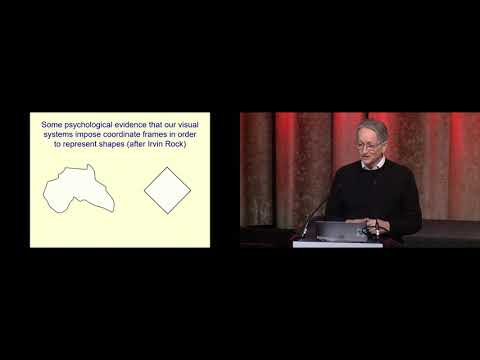

In [ ]:
YouTubeVideo('UX8OubxsY8w')

## Hypothesis testing

### [Difference between Prob(Data | Hypothesis) and Prba(Hypothesis | Data)](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/)

In [ ]:
Image(url = 'https://cxl.com/wp-content/uploads/2015/08/frequentists_vs_bayesians.png')

#### Frequentists approach:
$$P(D | H) = \frac{P(H | D) \cdot P(D)}{P(H)}$$

It is intuitive and hueristically reasonable:

1. I have some data samples, assuming normal distribution $\rightarrow$ P(D)
2. I have a hypothesis (mean != 0)
3. I compare my samples against to an altervative hypothesis (mean = 0) $\rightarrow$ P(H | D)
4. I have got a p value of the altervative hypothesis, so , 1 - that $\rightarrow$ p(H)

But, do we want to know $P(D|H)?$

#### Bayesian approach:
$$P(H|D) = \frac{P(D|H) \cdot P(H)}{P(D)}$$

It is often counter-intuitive, but hueristically reasonable after it makes sense to you: 

1. I have some data samples, no assumption of its population distribution $\rightarrow$ $P(D)$
2. I have a hypothesis (mean != 0)
3. I compute the likelihood of me getting the kind of data I have based on the hypothesis $\rightarrow$ $P(D|H)$
4. I don't have an alternative hypothesis, or at least it is not necessary
5. I have some prior knowledge about how likely my hypothesis is $\rightarrow$ $P(H)$
6. I then can calculate $P(H|D)$ use the formula
7. How the hell I calculate $P(D)$?

#### Machine learning can be seen as an empirical approach of the untrackable Bayesian statistics

1. Direct measure of $P(H | D)$
2. hypothesis is defined by cross-validation method $\rightarrow$ $P(H)$
3. $P(D)$ is irrelevant
4. $P(D|H)$ is computed by iterating through the data to look for so-called "patterns"
5. $P(H|D)$ is represented by the cross-validation scores

## General working flow of machine learning:

In [ ]:
Image(url = 'https://scikit-learn.org/stable/_images/grid_search_workflow.png',width = 800)

## Cross-validation methods

### K-folds

In [ ]:
Image(url='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png',width = 800)

### Leave one sample/group out -- LOO

In [ ]:
Image(url = 'https://miro.medium.com/max/3520/1*AVVhcmOs7WCBnpNhqi-L6g.png',width = 800)

### Stratified split -- take care of unbalanced classes

In [ ]:
Image(url = 'https://miro.medium.com/max/1463/1*TuWV2i98KmBxX5qkz_gX9g.png',width = 800)

### Time series cross validation

In [ ]:
Image(url = 'https://miro.medium.com/max/1703/1*WMJCAkveTgbdBveMMMZtUg.png',width = 800)

### for more: [redirect to scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold)

# Machine learning in behavioral studies

[Similar history biases for distinct prospective decisions of self-performance](https://github.com/nmningmei/metacognition)

# Machine learning in EEG 

[A working memeory study](https://github.com/nmningmei/VCRT_study)

# Machine learning in fMRI

[word processing](https://github.com/nmningmei/METASEMA_encoding_model)